In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
from sklearn.model_selection import train_test_split

In [2]:
import tsfresh

In [3]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [4]:
sns.set_context('poster')

In [5]:
ppallete = "BuGn"
porder = ['MIT9313', 'Natl2A', 'C9B', 'MIT9312', 'MED4']
pedge = 'green'
apallete = "Oranges"
aorder = ['1A3', 'DE', 'DE1', 'ATCC', 'BS11']
aedge='orange'              

In [6]:
df = pd.read_pickle('CCPA.pkl.gz')

In [7]:
dfw = df.loc[(df.experiment.isin(['e1', 'e3', 'e4','e5', 'e6'])) & (df.culture == 'Co_Culture')]

In [8]:
#dfw = df.loc[(df.experiment.isin(['e1','e3', 'e4','e5', 'e6'])) # & (df.culture == 'Co_Culture')
#            ]

In [9]:
dfdecline = cp.generate_decline(dfw, scale=False)
dfdecline = dfdecline.loc[dfdecline['day'] <= 80]

In [10]:
n = 'exponential'
f = cp.model_exponential
t = dfdecline.groupby('experiment_sample').apply(lambda x: cp.apply_fit(x, f))
dfdecline[n] = t['y_pred']
for i in range(3):
    dfdecline[f'popt_{i}'] = t[f'popt_{i}']
dfdecline['decline'] = dfdecline.FL
dfdecline['exponential_diff'] = dfdecline.FL - dfdecline.exponential
dfdecline['decline_scaled'] = dfdecline.groupby('experiment_sample').FL.transform(lambda x: x / x.max())
df_exp_coef = dfdecline.groupby(['experiment_sample','popt_0', 'popt_1', 'popt_2'])['decline'].count().reset_index(level=[1,2,3])\
.drop(columns='decline')

[4.77705916 0.26920881 0.49436731 1.        ]
[4.77705916 0.26920881 0.49436731 1.        ]
[4.94853207 0.3032342  0.58365495 1.        ]
[5.03886748 0.30233981 0.51228273 1.        ]
[6.53189225 0.12554764 0.38946091 1.        ]
[5.98186974 0.14458317 0.37380244 1.        ]
[5.94895663 0.13151723 0.39936459 1.        ]
[1.75657963 0.17267606 0.13507994 1.        ]
[1.74068155 0.17824872 0.13246934 1.        ]
[1.64533003 0.15512337 0.14118677 1.        ]
[3.58363265 0.05911679 0.63733275 1.        ]
[3.73700341 0.04183195 0.4201448  1.        ]
[3.84054238 0.05882247 0.41996078 1.        ]
[3.32467768 0.23915212 0.95571866 1.        ]
[3.87908522 0.39246858 1.38301276 1.        ]
[3.82416059 0.38748352 1.36688274 1.        ]
[4.01711301 0.15293672 0.49883399 1.        ]
[4.56814085 0.13847523 0.50939917 1.        ]
[3.85217947 0.14104228 0.44461394 1.        ]
Optimal parameters not found: The maximum number of function evaluations is exceeded.
[6.04610466 0.07411101 0.47996345 1.    

[3.71024033 0.28452485 0.15555782 1.        ]
[3.81343389 0.29484525 0.17633806 1.        ]
[1.61832219 0.19573845 0.1338496  1.        ]
[2.66997031 0.23351065 0.12907542 1.        ]
[3.02049921 0.22999087 0.1435685  1.        ]
[3.60485871 0.25262547 0.27834713 1.        ]
[3.72613234 0.30264162 0.27079887 1.        ]
[3.42198334 0.26897368 0.25146962 1.        ]
[0.73449599 0.22444784 0.07178865 1.        ]
[0.73993148 0.16717474 0.06730664 1.        ]
[0.95778981 0.5583634  0.08399927 1.        ]
[2.3711929  0.18372599 0.45076845 1.        ]
[2.16061773 0.0915342  0.31079534 1.        ]
[2.39508166 0.19193882 0.47129574 1.        ]
[1.59319679 0.22354365 0.41099855 1.        ]
[1.22431644 0.25071035 0.37924374 1.        ]
[1.52488416 0.32101119 0.42777186 1.        ]
[2.73145421 0.27587551 0.14761672 1.        ]
[1.11884738 0.38795224 0.04724172 1.        ]
[1.02234533 0.3723028  0.04879606 1.        ]
[3.10000375 0.23301197 0.1882045  1.        ]
[3.12433264 0.23377294 0.19899852 

In [11]:
dfdecline.columns


Index(['experiment_sample', 'day', 'FL', 'experiment', 'sample', 'PRO', 'ALT',
       'culture', 'exponential', 'popt_0', 'popt_1', 'popt_2', 'decline',
       'exponential_diff', 'decline_scaled'],
      dtype='object')

In [12]:
dfdecline.head()

,experiment_sample,day,FL,experiment,sample,PRO,ALT,culture,exponential,popt_0,popt_1,popt_2,decline,exponential_diff,decline_scaled
0,"e1, 10A",0.000000,5.621,e1,10A,C9B,DE,Co_Culture,5.271426,4.777059,0.269209,0.494367,5.621,0.349574,1.000000
1,"e1, 10A",0.893056,4.045,e1,10A,C9B,DE,Co_Culture,4.250563,4.777059,0.269209,0.494367,4.045,-0.205563,0.719623
2,"e1, 10A",1.991667,2.749,e1,10A,C9B,DE,Co_Culture,3.288861,4.777059,0.269209,0.494367,2.749,-0.539861,0.489059
3,"e1, 10A",4.697222,2.924,e1,10A,C9B,DE,Co_Culture,1.843270,4.777059,0.269209,0.494367,2.924,1.080730,0.520192
4,"e1, 10A",5.700000,2.519,e1,10A,C9B,DE,Co_Culture,1.524137,4.777059,0.269209,0.494367,2.519,0.994863,0.448141


In [13]:
features_df = cp.generate_features(dfw)

In [14]:
dfw.columns

Index(['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture', 'FL_orig',
       'logFL', 'cumsumFL', 'cumsumlogFL', 'zscoreFL', 'diffFL', 'difflogFL',
       'diffday', 'rateFL', 'ratelogFL', 'experiment_sample'],
      dtype='object')

In [15]:
ts_metadf = cp.get_meta(dfw)
ts_metadf.index = ts_metadf.experiment_sample
_y= ts_metadf.PRO + ','+ ts_metadf.ALT
ts_features_df = tsfresh.extract_relevant_features(
    dfw.loc[:, ['experiment_sample', 'FL', 'logFL', 'cumsumFL', 'cumsumlogFL', 'rateFL', 'ratelogFL', 'day']].fillna(0),
    _y,
     column_id='experiment_sample', column_kind=None, 
     column_sort='day', 
     #column_value=
    )


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [01:25<00:00,  4.28s/it]
 'FL__fft_coefficient__coeff_45__attr_"angle"'
 'FL__fft_coefficient__coeff_45__attr_"imag"' ...
 'ratelogFL__fft_coefficient__coeff_99__attr_"angle"'
 'ratelogFL__fft_coefficient__coeff_99__attr_"imag"'
 'ratelogFL__fft_coefficient__coeff_99__attr_"real"'] did not have any finite values. Filling with zeros.


In [16]:
ts_features_df.shape

(343, 1134)

In [17]:
dfdecline.columns

Index(['experiment_sample', 'day', 'FL', 'experiment', 'sample', 'PRO', 'ALT',
       'culture', 'exponential', 'popt_0', 'popt_1', 'popt_2', 'decline',
       'exponential_diff', 'decline_scaled'],
      dtype='object')

In [18]:
ts_decline_metadf = cp.get_meta(dfdecline)
ts_decline_metadf.index = ts_decline_metadf.experiment_sample
_y= ts_decline_metadf.PRO + ','+ ts_decline_metadf.ALT
ts_decline_features_df = tsfresh.extract_relevant_features(
    dfdecline.loc[:, ['experiment_sample', 'day', 
       'exponential', 'decline', 'exponential_diff',
       'decline_scaled'] ].fillna(0),
    _y,
     column_id='experiment_sample', column_kind=None, 
     column_sort='day', 
     #column_value=
    )


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:38<00:00,  1.06s/it]
 'decline__fft_coefficient__coeff_29__attr_"angle"'
 'decline__fft_coefficient__coeff_29__attr_"imag"' ...
 'exponential_diff__fft_coefficient__coeff_99__attr_"angle"'
 'exponential_diff__fft_coefficient__coeff_99__attr_"imag"'
 'exponential_diff__fft_coefficient__coeff_99__attr_"real"'] did not have any finite values. Filling with zeros.


# Compare Models

In [19]:
# compare models based on different experiment features
# value_col, 

value_col_list = ['FL', 'logFL', 'cumsumFL', 'cumsumlogFL']
#, 'zscoreFL', 'rateFL', 'ratelogFL']
resample_period_list = [None, '1d', '3d', '5d']
y_col_list = ['PRO', 'ALT', 'PRO_ALT', 'ALT_PRO']
cumsummode_list = [False, True]

In [20]:
repetitions=2

In [21]:
stats_list = []
y_list = []
clf_list = []
features_list = []
decline_col_list = ['exponential', 'decline', 'exponential_diff', 'decline_scaled']

In [22]:
res, _y_list, _clf_list, _features_list = cp.compare_models(dfw, 
               value_col_list=value_col_list, 
               resample_period_list=resample_period_list, 
               y_col_list=y_col_list, 
               cumsummode_list=cumsummode_list,
               repetitions=repetitions,
               return_y=True)
stats_list.extend(res)
y_list.extend(_y_list)
clf_list.extend(_clf_list)
features_list.extend(_features_list)

PRO_FL
train score 0.9892086330935251
PRO_FL
train score 0.9928057553956835
ALT_FL
train score 0.9964028776978417
ALT_FL
train score 1.0
PRO_ALT_FL
train score 0.9964028776978417
PRO_ALT_FL
train score 0.9964028776978417
ALT_PRO_FL
train score 1.0
ALT_PRO_FL
train score 1.0
PRO_FL_cumsum
train score 0.9424460431654677
PRO_FL_cumsum
train score 0.9568345323741008
ALT_FL_cumsum
train score 0.9676258992805755
ALT_FL_cumsum
train score 0.9712230215827338
PRO_ALT_FL_cumsum
train score 0.9316546762589928
PRO_ALT_FL_cumsum
train score 0.9280575539568345
ALT_PRO_FL_cumsum
train score 0.9460431654676259
ALT_PRO_FL_cumsum
train score 0.9424460431654677
PRO_FL_1d
train score 0.9928057553956835
PRO_FL_1d
train score 0.9784172661870504
ALT_FL_1d
train score 0.920863309352518
ALT_FL_1d
train score 0.9928057553956835
PRO_ALT_FL_1d
train score 1.0
PRO_ALT_FL_1d
train score 1.0
ALT_PRO_FL_1d
train score 1.0
ALT_PRO_FL_1d
train score 1.0
PRO_FL_1d_cumsum
train score 0.9640287769784173
PRO_FL_1d_cumsum
t

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_logFL_cumsum
train score 0.960431654676259
PRO_ALT_logFL_cumsum
train score 0.935251798561151
PRO_ALT_logFL_cumsum
train score 0.9316546762589928
ALT_PRO_logFL_cumsum
train score 0.9424460431654677
ALT_PRO_logFL_cumsum
train score 0.9280575539568345
PRO_logFL_1d
train score 0.9928057553956835
PRO_logFL_1d
train score 0.9892086330935251
ALT_logFL_1d
train score 0.9820143884892086
ALT_logFL_1d
train score 0.9856115107913669
PRO_ALT_logFL_1d
train score 1.0
PRO_ALT_logFL_1d
train score 0.9964028776978417
ALT_PRO_logFL_1d
train score 1.0
ALT_PRO_logFL_1d
train score 0.9928057553956835
PRO_logFL_1d_cumsum
train score 0.9496402877697842
PRO_logFL_1d_cumsum
train score 0.8705035971223022
ALT_logFL_1d_cumsum
train score 0.9496402877697842
ALT_logFL_1d_cumsum
train score 0.9424460431654677
PRO_ALT_logFL_1d_cumsum
train score 0.935251798561151
PRO_ALT_logFL_1d_cumsum
train score 0.9496402877697842
ALT_PRO_logFL_1d_cumsum
train score 0.9316546762589928
ALT_PRO_logFL_1d_cumsum
train score 0.92

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumFL_cumsum
train score 0.9424460431654677


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_PRO_cumsumFL_cumsum
train score 0.9280575539568345
ALT_PRO_cumsumFL_cumsum
train score 0.9388489208633094
PRO_cumsumFL_1d
train score 0.9676258992805755
PRO_cumsumFL_1d
train score 0.9424460431654677
ALT_cumsumFL_1d
train score 0.960431654676259
ALT_cumsumFL_1d
train score 0.9712230215827338
PRO_ALT_cumsumFL_1d
train score 0.9568345323741008
PRO_ALT_cumsumFL_1d
train score 0.9676258992805755
ALT_PRO_cumsumFL_1d
train score 0.9640287769784173
ALT_PRO_cumsumFL_1d
train score 0.9640287769784173
PRO_cumsumFL_1d_cumsum
train score 0.9496402877697842
PRO_cumsumFL_1d_cumsum
train score 0.9460431654676259
ALT_cumsumFL_1d_cumsum
train score 0.9316546762589928
ALT_cumsumFL_1d_cumsum
train score 0.9568345323741008
PRO_ALT_cumsumFL_1d_cumsum
train score 0.9244604316546763
PRO_ALT_cumsumFL_1d_cumsum
train score 0.9460431654676259
ALT_PRO_cumsumFL_1d_cumsum
train score 0.9280575539568345
ALT_PRO_cumsumFL_1d_cumsum
train score 0.9280575539568345
PRO_cumsumFL_3d
train score 0.9532374100719424
PRO_

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d
train score 0.9172661870503597
ALT_cumsumFL_3d
train score 0.9388489208633094
PRO_ALT_cumsumFL_3d
train score 0.9172661870503597
PRO_ALT_cumsumFL_3d
train score 0.9676258992805755
ALT_PRO_cumsumFL_3d
train score 0.935251798561151
ALT_PRO_cumsumFL_3d
train score 0.9460431654676259
PRO_cumsumFL_3d_cumsum
train score 0.9460431654676259
PRO_cumsumFL_3d_cumsum
train score 0.9460431654676259
ALT_cumsumFL_3d_cumsum
train score 0.9136690647482014


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_3d_cumsum
train score 0.8992805755395683
PRO_ALT_cumsumFL_3d_cumsum
train score 0.9244604316546763
PRO_ALT_cumsumFL_3d_cumsum
train score 0.920863309352518
ALT_PRO_cumsumFL_3d_cumsum
train score 0.9172661870503597
ALT_PRO_cumsumFL_3d_cumsum
train score 0.9280575539568345
PRO_cumsumFL_5d
train score 0.9640287769784173
PRO_cumsumFL_5d
train score 0.9640287769784173
ALT_cumsumFL_5d
train score 0.8992805755395683
ALT_cumsumFL_5d
train score 0.9388489208633094
PRO_ALT_cumsumFL_5d
train score 0.9280575539568345
PRO_ALT_cumsumFL_5d
train score 0.935251798561151
ALT_PRO_cumsumFL_5d
train score 0.9100719424460432
ALT_PRO_cumsumFL_5d
train score 0.935251798561151
PRO_cumsumFL_5d_cumsum
train score 0.9280575539568345
PRO_cumsumFL_5d_cumsum
train score 0.9460431654676259
ALT_cumsumFL_5d_cumsum
train score 0.920863309352518


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumFL_5d_cumsum
train score 0.9388489208633094
PRO_ALT_cumsumFL_5d_cumsum
train score 0.9172661870503597
PRO_ALT_cumsumFL_5d_cumsum
train score 0.9028776978417267
ALT_PRO_cumsumFL_5d_cumsum
train score 0.9172661870503597
ALT_PRO_cumsumFL_5d_cumsum
train score 0.9064748201438849
PRO_cumsumlogFL
train score 0.9532374100719424
PRO_cumsumlogFL
train score 0.8920863309352518
ALT_cumsumlogFL
train score 0.9748201438848921
ALT_cumsumlogFL
train score 0.9820143884892086


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL
train score 0.9460431654676259
PRO_ALT_cumsumlogFL
train score 0.9532374100719424
ALT_PRO_cumsumlogFL
train score 0.9424460431654677
ALT_PRO_cumsumlogFL
train score 0.9388489208633094


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_cumsumlogFL_cumsum
train score 0.9532374100719424
PRO_cumsumlogFL_cumsum
train score 0.9424460431654677
ALT_cumsumlogFL_cumsum
train score 0.9316546762589928
ALT_cumsumlogFL_cumsum
train score 0.9280575539568345
PRO_ALT_cumsumlogFL_cumsum
train score 0.9100719424460432


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_cumsum
train score 0.8992805755395683


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_PRO_cumsumlogFL_cumsum
train score 0.9028776978417267
ALT_PRO_cumsumlogFL_cumsum
train score 0.8920863309352518
PRO_cumsumlogFL_1d
train score 0.9316546762589928
PRO_cumsumlogFL_1d
train score 0.9568345323741008


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 0.9568345323741008


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d
train score 0.960431654676259


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d
train score 0.9460431654676259
PRO_ALT_cumsumlogFL_1d
train score 0.9424460431654677
ALT_PRO_cumsumlogFL_1d
train score 0.9424460431654677


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_PRO_cumsumlogFL_1d
train score 0.9568345323741008
PRO_cumsumlogFL_1d_cumsum
train score 0.9424460431654677
PRO_cumsumlogFL_1d_cumsum
train score 0.9388489208633094


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_1d_cumsum
train score 0.9388489208633094
ALT_cumsumlogFL_1d_cumsum
train score 0.9316546762589928


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 0.9172661870503597


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_1d_cumsum
train score 0.9136690647482014
ALT_PRO_cumsumlogFL_1d_cumsum
train score 0.9100719424460432
ALT_PRO_cumsumlogFL_1d_cumsum
train score 0.8992805755395683
PRO_cumsumlogFL_3d
train score 0.9532374100719424
PRO_cumsumlogFL_3d
train score 0.9496402877697842
ALT_cumsumlogFL_3d
train score 0.9460431654676259
ALT_cumsumlogFL_3d
train score 0.9460431654676259
PRO_ALT_cumsumlogFL_3d
train score 0.9388489208633094
PRO_ALT_cumsumlogFL_3d
train score 0.935251798561151
ALT_PRO_cumsumlogFL_3d
train score 0.9424460431654677
ALT_PRO_cumsumlogFL_3d
train score 0.9532374100719424
PRO_cumsumlogFL_3d_cumsum
train score 0.9388489208633094
PRO_cumsumlogFL_3d_cumsum
train score 0.9388489208633094
ALT_cumsumlogFL_3d_cumsum
train score 0.9316546762589928
ALT_cumsumlogFL_3d_cumsum
train score 0.8920863309352518
PRO_ALT_cumsumlogFL_3d_cumsum
train score 0.8776978417266187
PRO_ALT_cumsumlogFL_3d_cumsum
train score 0.89568345323741
ALT_PRO_cumsumlogFL_3d_cumsum
train score 0.9064748201

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d
train score 0.9460431654676259


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_ALT_cumsumlogFL_5d
train score 0.9316546762589928
PRO_ALT_cumsumlogFL_5d
train score 0.9316546762589928
ALT_PRO_cumsumlogFL_5d
train score 0.9244604316546763


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_PRO_cumsumlogFL_5d
train score 0.920863309352518
PRO_cumsumlogFL_5d_cumsum
train score 0.9568345323741008
PRO_cumsumlogFL_5d_cumsum
train score 0.935251798561151


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_cumsumlogFL_5d_cumsum
train score 0.9136690647482014
ALT_cumsumlogFL_5d_cumsum
train score 0.9064748201438849
PRO_ALT_cumsumlogFL_5d_cumsum
train score 0.9028776978417267
PRO_ALT_cumsumlogFL_5d_cumsum
train score 0.9028776978417267


C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ALT_PRO_cumsumlogFL_5d_cumsum
train score 0.9028776978417267
ALT_PRO_cumsumlogFL_5d_cumsum
train score 0.8992805755395683


In [23]:
res, _y_list, _clf_list, _features_list = cp.compare_models(dfdecline, 
               value_col_list=decline_col_list, 
               resample_period_list=resample_period_list, 
               y_col_list=y_col_list, 
               cumsummode_list=cumsummode_list,
               repetitions=repetitions,
               return_y=True)
stats_list.extend(res)
y_list.extend(_y_list)
clf_list.extend(_clf_list)
features_list.extend(_features_list)

PRO_exponential
train score 0.9532374100719424
PRO_exponential
train score 0.960431654676259
ALT_exponential
train score 0.9496402877697842
ALT_exponential
train score 0.9316546762589928
PRO_ALT_exponential
train score 0.935251798561151
PRO_ALT_exponential
train score 0.9388489208633094
ALT_PRO_exponential
train score 0.9280575539568345
ALT_PRO_exponential
train score 0.9136690647482014
PRO_exponential_cumsum
train score 0.9496402877697842
PRO_exponential_cumsum
train score 0.9388489208633094
ALT_exponential_cumsum
train score 0.9100719424460432
ALT_exponential_cumsum
train score 0.9280575539568345
PRO_ALT_exponential_cumsum
train score 0.8705035971223022
PRO_ALT_exponential_cumsum
train score 0.9064748201438849
ALT_PRO_exponential_cumsum
train score 0.89568345323741
ALT_PRO_exponential_cumsum
train score 0.8848920863309353
PRO_exponential_1d
train score 0.935251798561151
PRO_exponential_1d
train score 0.9280575539568345
ALT_exponential_1d
train score 0.920863309352518
ALT_exponential_

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


PRO_decline_1d_cumsum
train score 0.9496402877697842
ALT_decline_1d_cumsum
train score 0.9388489208633094
ALT_decline_1d_cumsum
train score 0.920863309352518
PRO_ALT_decline_1d_cumsum
train score 0.9172661870503597
PRO_ALT_decline_1d_cumsum
train score 0.9244604316546763
ALT_PRO_decline_1d_cumsum
train score 0.9244604316546763
ALT_PRO_decline_1d_cumsum
train score 0.8992805755395683
PRO_decline_3d
train score 0.9712230215827338
PRO_decline_3d
train score 0.9748201438848921
ALT_decline_3d
train score 0.9892086330935251
ALT_decline_3d
train score 0.9676258992805755
PRO_ALT_decline_3d
train score 0.9820143884892086
PRO_ALT_decline_3d
train score 0.9748201438848921
ALT_PRO_decline_3d
train score 0.9892086330935251
ALT_PRO_decline_3d
train score 0.9892086330935251
PRO_decline_3d_cumsum
train score 0.8453237410071942
PRO_decline_3d_cumsum
train score 0.9244604316546763
ALT_decline_3d_cumsum
train score 0.8705035971223022
ALT_decline_3d_cumsum
train score 0.89568345323741
PRO_ALT_decline_3d_c

train score 0.8992805755395683
ALT_PRO_decline_scaled_3d_cumsum
train score 0.8920863309352518
ALT_PRO_decline_scaled_3d_cumsum
train score 0.9100719424460432
PRO_decline_scaled_5d
train score 0.9496402877697842
PRO_decline_scaled_5d
train score 0.935251798561151
ALT_decline_scaled_5d
train score 0.9136690647482014
ALT_decline_scaled_5d
train score 0.9532374100719424
PRO_ALT_decline_scaled_5d
train score 0.9892086330935251
PRO_ALT_decline_scaled_5d
train score 0.9964028776978417
ALT_PRO_decline_scaled_5d
train score 0.9928057553956835
ALT_PRO_decline_scaled_5d
train score 0.9856115107913669
PRO_decline_scaled_5d_cumsum
train score 0.920863309352518
PRO_decline_scaled_5d_cumsum
train score 0.9100719424460432
ALT_decline_scaled_5d_cumsum
train score 0.9244604316546763
ALT_decline_scaled_5d_cumsum
train score 0.9100719424460432
PRO_ALT_decline_scaled_5d_cumsum
train score 0.9172661870503597
PRO_ALT_decline_scaled_5d_cumsum
train score 0.9064748201438849
ALT_PRO_decline_scaled_5d_cumsum
tr

In [24]:
res, _y_list, _clf_list, _features_list = cp.compare_models_features(features_df, 
               y_col_list=y_col_list, 
               repetitions=repetitions,
               return_y=True)
stats_list.extend(res)
y_list.extend(_y_list)
clf_list.extend(_clf_list)
features_list.extend(_features_list)

C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


PRO_features
train score 0.9820143884892086
PRO_features
train score 0.9928057553956835
ALT_features
train score 0.9964028776978417
ALT_features
train score 0.9964028776978417
PRO_ALT_features
train score 0.9892086330935251
PRO_ALT_features
train score 0.9820143884892086
ALT_PRO_features
train score 0.9928057553956835
ALT_PRO_features
train score 0.9856115107913669


In [25]:
res, _y_list, _clf_list, _features_list = cp.compare_models_ts_features(ts_features_df, ts_metadf,
               y_col_list=y_col_list, 
               repetitions=repetitions,
               return_y=True)
stats_list.extend(res)
y_list.extend(_y_list)
clf_list.extend(_clf_list)
features_list.extend(_features_list)

PRO_ts_features
train score 0.9892086330935251
PRO_ts_features
train score 0.9928057553956835
ALT_ts_features
train score 1.0
ALT_ts_features
train score 1.0
PRO_ALT_ts_features
train score 0.9964028776978417
PRO_ALT_ts_features
train score 1.0
ALT_PRO_ts_features
train score 1.0
ALT_PRO_ts_features
train score 0.9928057553956835


In [26]:
res, _y_list, _clf_list, _features_list = cp.compare_models_ts_features(ts_decline_features_df, ts_decline_metadf,
               y_col_list=y_col_list, mode='_decline',
               repetitions=repetitions,
               return_y=True)
stats_list.extend(res)
y_list.extend(_y_list)
clf_list.extend(_clf_list)
features_list.extend(_features_list)

PRO_ts_features_decline
train score 0.9784172661870504
PRO_ts_features_decline
train score 0.9856115107913669
ALT_ts_features_decline
train score 1.0
ALT_ts_features_decline
train score 1.0
PRO_ALT_ts_features_decline
train score 0.9928057553956835
PRO_ALT_ts_features_decline
train score 1.0
ALT_PRO_ts_features_decline
train score 0.9928057553956835
ALT_PRO_ts_features_decline
train score 0.9964028776978417


In [27]:
res, _y_list, _clf_list, _features_list = cp.compare_models_ts_features(df_exp_coef, ts_decline_metadf,
               y_col_list=y_col_list, mode='_exponential_coef',
               repetitions=repetitions,
               return_y=True)
stats_list.extend(res)
y_list.extend(_y_list)
clf_list.extend(_clf_list)
features_list.extend(_features_list)

PRO_ts_featuresexponential_coef
train score 0.9136690647482014
PRO_ts_featuresexponential_coef
train score 0.9136690647482014
ALT_ts_featuresexponential_coef
train score 0.9028776978417267
ALT_ts_featuresexponential_coef
train score 0.8920863309352518
PRO_ALT_ts_featuresexponential_coef
train score 0.8884892086330936
PRO_ALT_ts_featuresexponential_coef
train score 0.89568345323741
ALT_PRO_ts_featuresexponential_coef
train score 0.8992805755395683
ALT_PRO_ts_featuresexponential_coef
train score 0.9172661870503597


In [95]:
dfg = dfdecline.groupby('experiment_sample').apply(cp._calculate_exponential_diff_features)
dfg = dfg.fillna(0)
res, _y_list, _clf_list, _features_list = cp.compare_models_ts_features(dfg, ts_decline_metadf,
               y_col_list=y_col_list, mode='_exp_diff_features_',
               repetitions=repetitions,
               return_y=True)
stats_list.extend(res)
y_list.extend(_y_list)
clf_list.extend(_clf_list)
features_list.extend(_features_list)

PRO_ts_features_exp_diff_features_
train score 0.9712230215827338
PRO_ts_features_exp_diff_features_
train score 0.9712230215827338
ALT_ts_features_exp_diff_features_
train score 0.9532374100719424
ALT_ts_features_exp_diff_features_
train score 0.9568345323741008
PRO_ALT_ts_features_exp_diff_features_
train score 0.9496402877697842
PRO_ALT_ts_features_exp_diff_features_
train score 0.9496402877697842
ALT_PRO_ts_features_exp_diff_features_
train score 0.9460431654676259
ALT_PRO_ts_features_exp_diff_features_
train score 0.9496402877697842


In [96]:
len(stats_list)

552

In [97]:
stats_df = pd.DataFrame.from_records(stats_list)

In [98]:
stats_df.fillna({'resample_period' : 'N/A'}, inplace=True)

In [99]:
stats_df.describe()

,accuracy_test,accuracy_train,f1_test,f1_train,n_features,orig_n_features,precision_test,precision_train,recall_test,recall_train
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,0.337625,0.956391,0.312101,0.956327,212.186594,449.753623,0.339337,0.957101,0.337625,0.956391
std,0.118609,0.040463,0.121211,0.040593,560.677037,922.118974,0.146832,0.039899,0.118609,0.040463
min,0.123077,0.640288,0.080313,0.639548,1.000000,3.000000,0.052650,0.645526,0.123077,0.640288
25%,0.246154,0.935252,0.219929,0.935112,14.000000,29.000000,0.230404,0.935617,0.246154,0.935252
50%,0.323077,0.964029,0.300757,0.963931,28.500000,67.000000,0.317136,0.964271,0.323077,0.964029
75%,0.415385,0.989209,0.390612,0.989210,92.250000,357.000000,0.444155,0.989382,0.415385,0.989209
max,0.707692,1.000000,0.705769,1.000000,2887.000000,2946.000000,0.729929,1.000000,0.707692,1.000000


In [100]:
stats_df.value_col.unique()

array(['FL', 'logFL', 'cumsumFL', 'cumsumlogFL', 'exponential', 'decline',
       'exponential_diff', 'decline_scaled', 'features', 'ts_features',
       'ts_features_decline', 'ts_featuresexponential_coef',
       'ts_features_exp_diff_features_'], dtype=object)

In [101]:
stats_df.loc[stats_df['value_col'] == 'ts_featuresexponential_coef', 'value_col'] = 'exponential_coef'
stats_df.loc[stats_df['value_col'] == 'ts_features_exp_diff_features_', 'value_col'] = 'exp_diff_features'


C:\Users\wosnat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


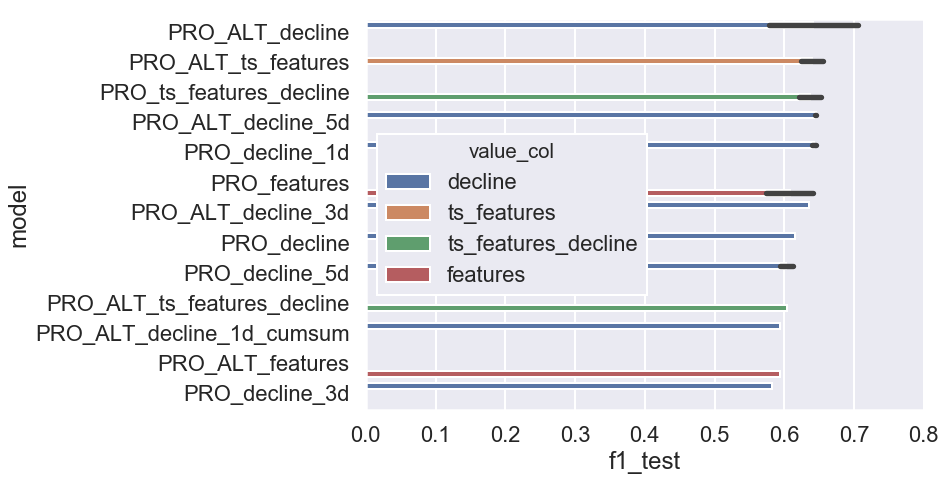

In [102]:
f, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x="f1_test", y="model", data=stats_df.sort_values(by="f1_test").nlargest(columns="f1_test", n=20),
            hue='value_col')

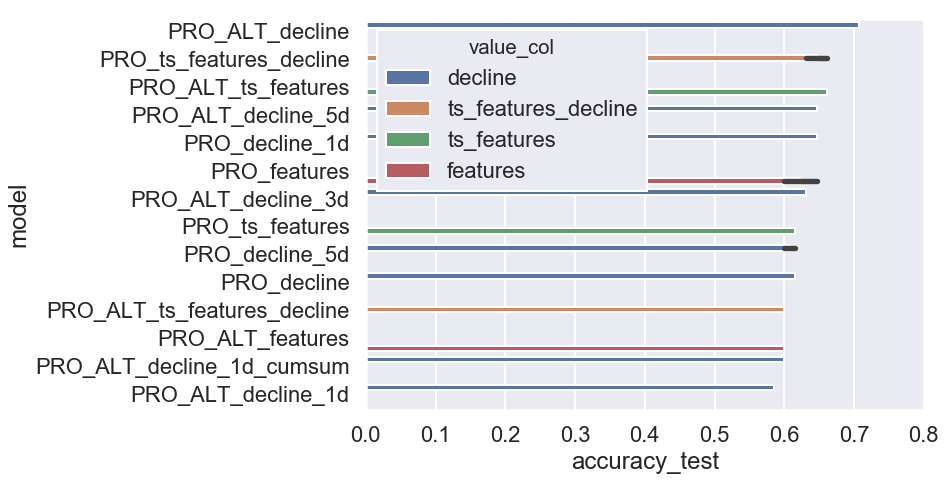

In [103]:
f, ax = plt.subplots(figsize=(10, 7))
v='accuracy_test'
sns.barplot(x=v, y="model", data=stats_df.sort_values(by=v).nlargest(columns=v, n=20),
            hue='value_col')

# Pro comparison

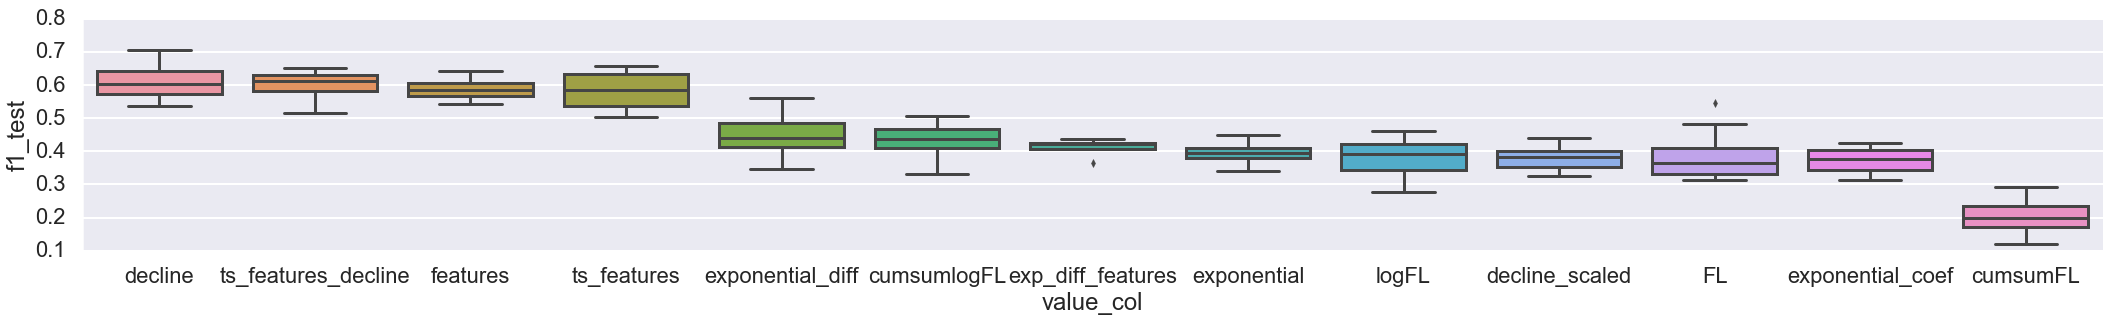

In [104]:
order = stats_df.loc[(stats_df.y_col.isin(['PRO', 'PRO_ALT'])) & (stats_df['cumsum'] == False)].groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[(stats_df.y_col.isin(['PRO', 'PRO_ALT'])) & (stats_df['cumsum'] == False)], 
            x='value_col', y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=6, kind='box',
            order=order,
           )


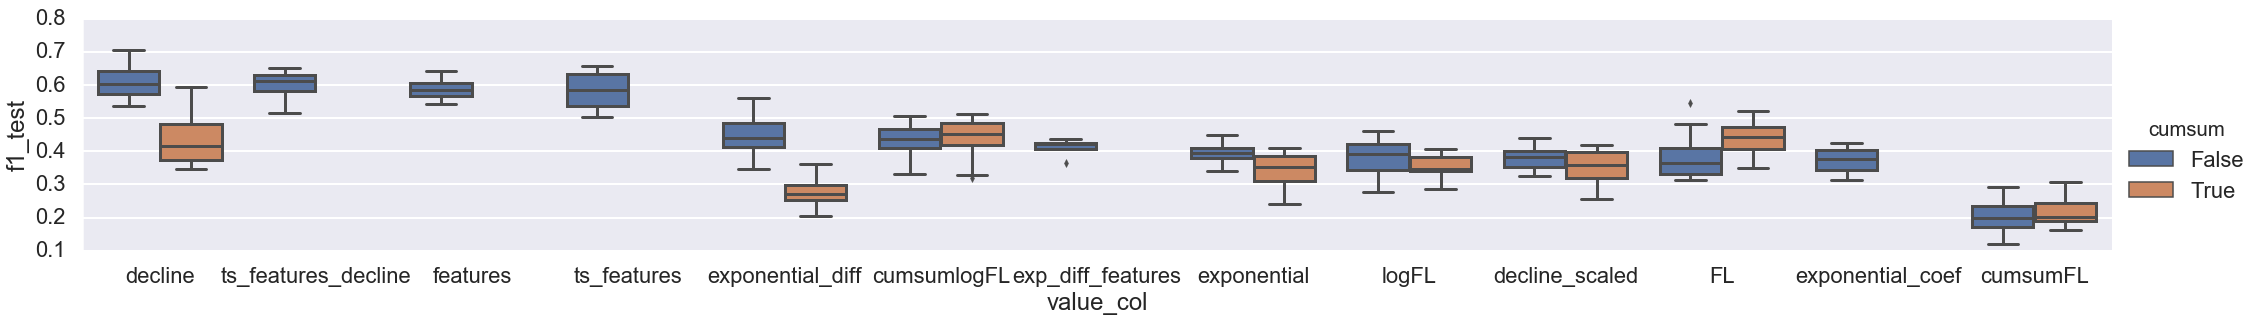

In [105]:
#order = stats_df.groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[stats_df.y_col.isin(['PRO', 'PRO_ALT']) ], 
            x='value_col', y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=6, kind='box',
            order=order,
            hue='cumsum'
           )


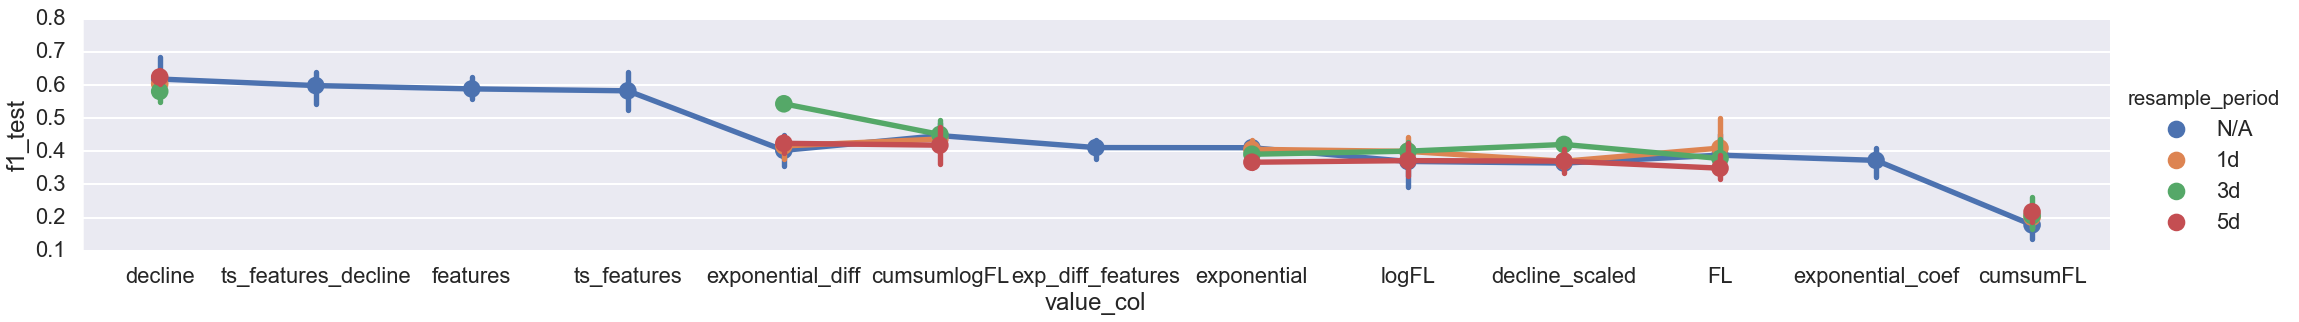

In [106]:
sns.catplot(data=stats_df.loc[stats_df.y_col.isin(['PRO', 'PRO_ALT']) & (stats_df['cumsum'] == False)], 
            x='value_col', y='f1_test', 
            hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=6, kind='point',
            order=order
           )


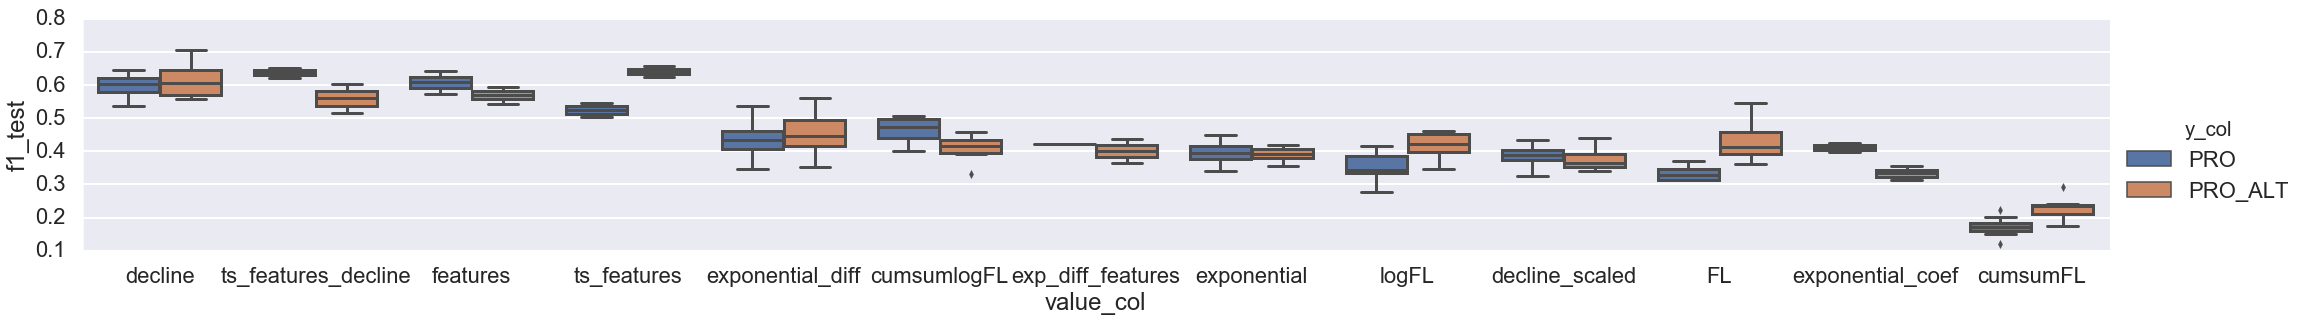

In [107]:
sns.catplot(data=stats_df.loc[stats_df.y_col.isin(['PRO', 'PRO_ALT']) & (stats_df['cumsum'] == False)], 
            x='value_col', y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            hue='y_col', 
            aspect=6, kind='box',
            order=order
           )


# ALT comparison

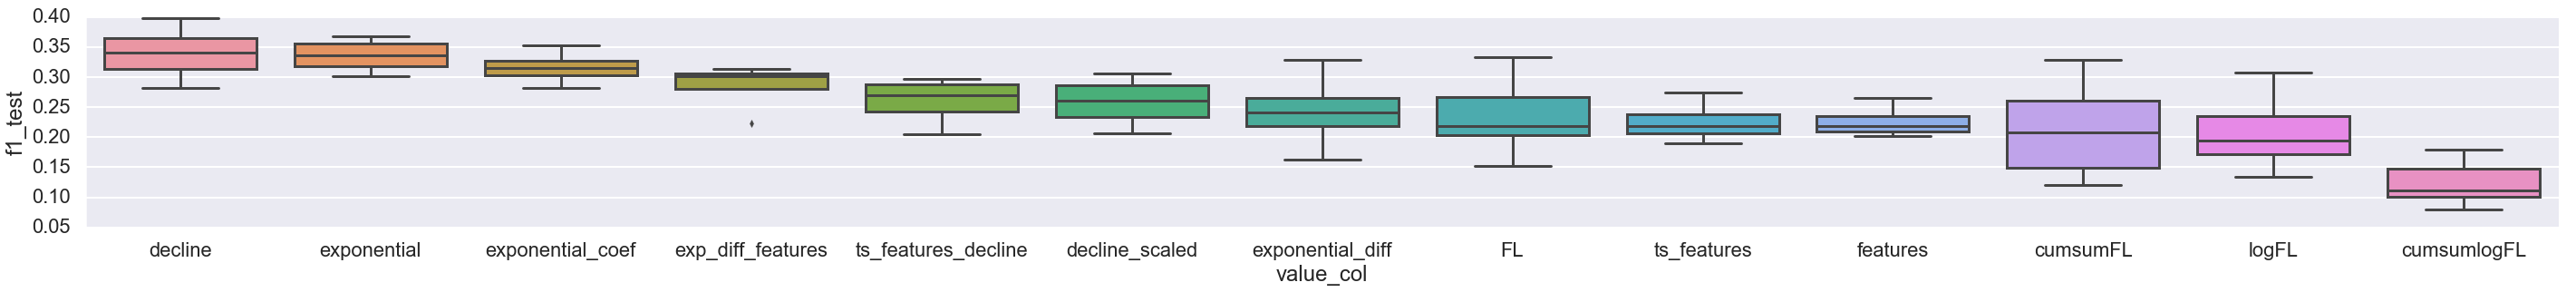

In [108]:
order = stats_df.loc[(stats_df.y_col.isin(['ALT', 'ALT_PRO'])) & (stats_df['cumsum'] == False)].groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[(stats_df.y_col.isin(['ALT', 'ALT_PRO'])) & (stats_df['cumsum'] == False)], 
            x='value_col', y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=8, kind='box',
            order=order,
           )


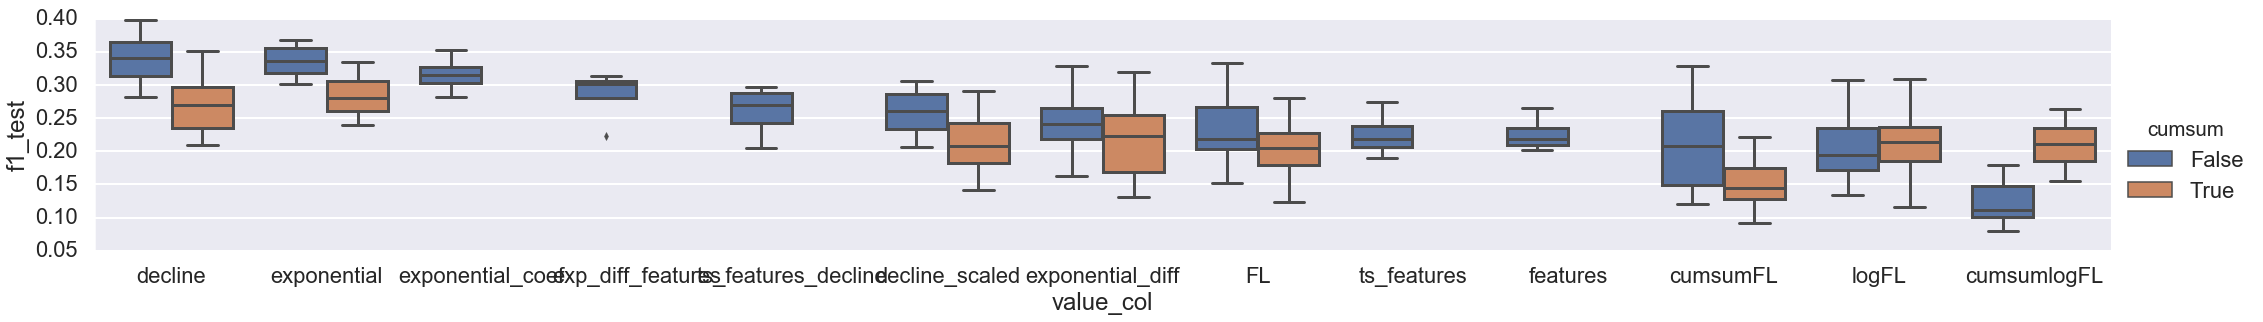

In [109]:
#order = stats_df.groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[stats_df.y_col.isin(['ALT', 'ALT_PRO']) ], 
            x='value_col', y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=6, kind='box',
            order=order,
            hue='cumsum'
           )


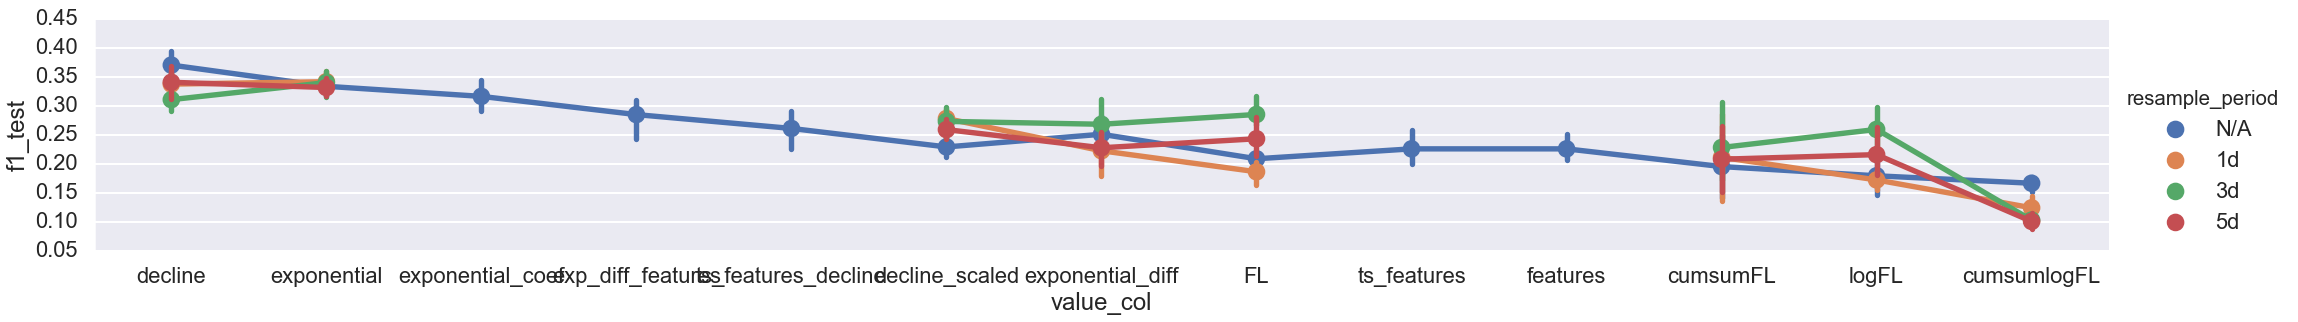

In [110]:
sns.catplot(data=stats_df.loc[stats_df.y_col.isin(['ALT', 'ALT_PRO']) & (stats_df['cumsum'] == False)], 
            x='value_col', y='f1_test', 
            hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=6, kind='point',
            order=order
           )


In [111]:
stats_df.loc[:,['model', 'f1_test']].nlargest(columns=['f1_test'], n=15)

,model,f1_test
324,PRO_ALT_decline,0.705769
525,PRO_ALT_ts_features,0.655842
529,PRO_ts_features_decline,0.652499
373,PRO_ALT_decline_5d,0.646091
337,PRO_decline_1d,0.645921
372,PRO_ALT_decline_5d,0.644229
513,PRO_features,0.641604
336,PRO_decline_1d,0.639965
356,PRO_ALT_decline_3d,0.635268
524,PRO_ALT_ts_features,0.623549


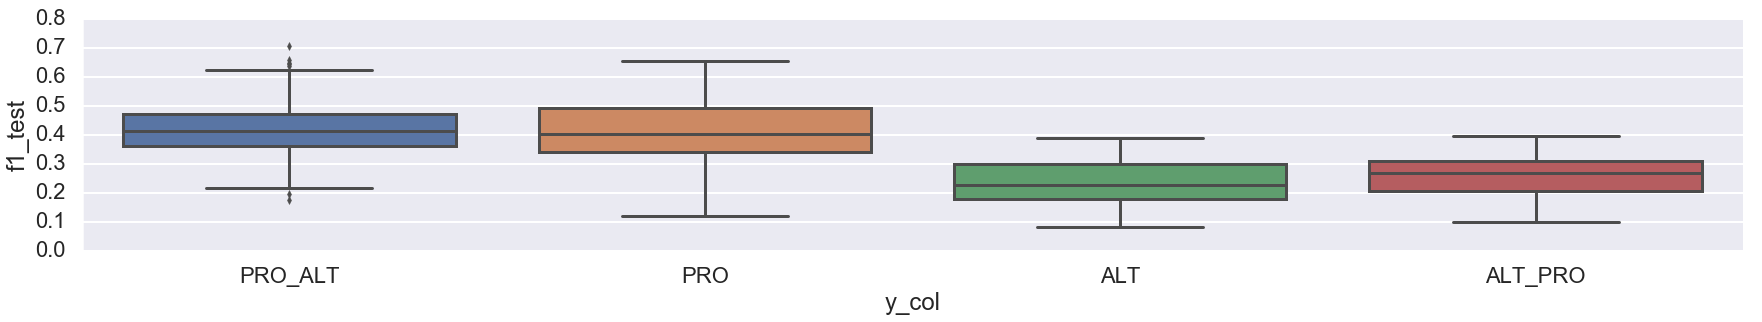

In [112]:
#order = stats_df.loc[(stats_df.y_col.isin(['ALT'])) & (stats_df['cumsum'] == False)].groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[( #(stats_df.y_col.isin(['ALT'])) & 
                               (stats_df['cumsum'] == False) )], 
            x='y_col', 
            y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=5, kind='box',
            order=['PRO_ALT', 'PRO', 'ALT', 'ALT_PRO'],
           )


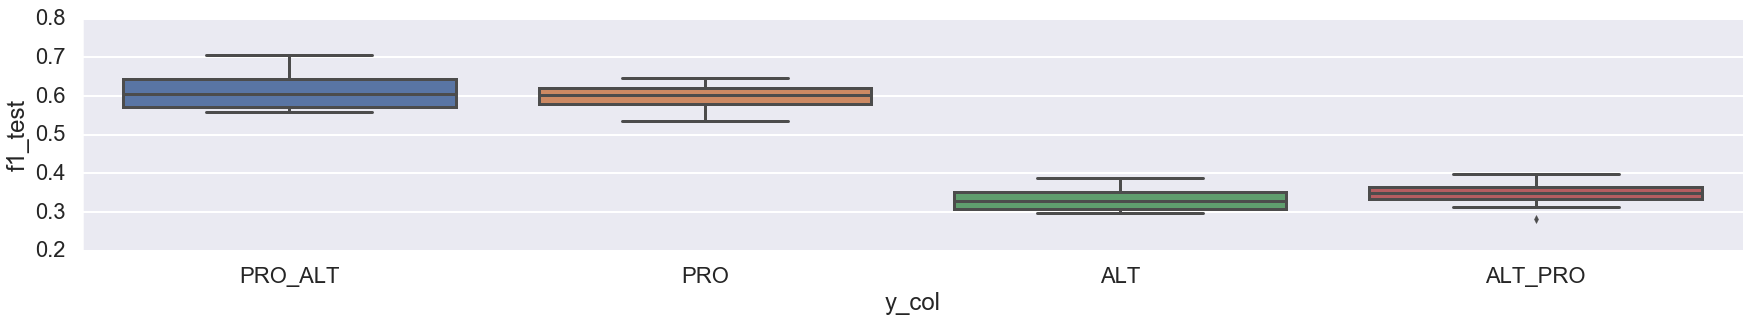

In [113]:
#order = stats_df.loc[(stats_df.y_col.isin(['ALT'])) & (stats_df['cumsum'] == False)].groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[( #(stats_df.y_col.isin(['ALT'])) & 
                               (stats_df['cumsum'] == False) & 
                              (stats_df['value_col'] == 'decline'))], 
            x='y_col', 
            y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=5, kind='box',
            order=['PRO_ALT', 'PRO', 'ALT', 'ALT_PRO'],
           )


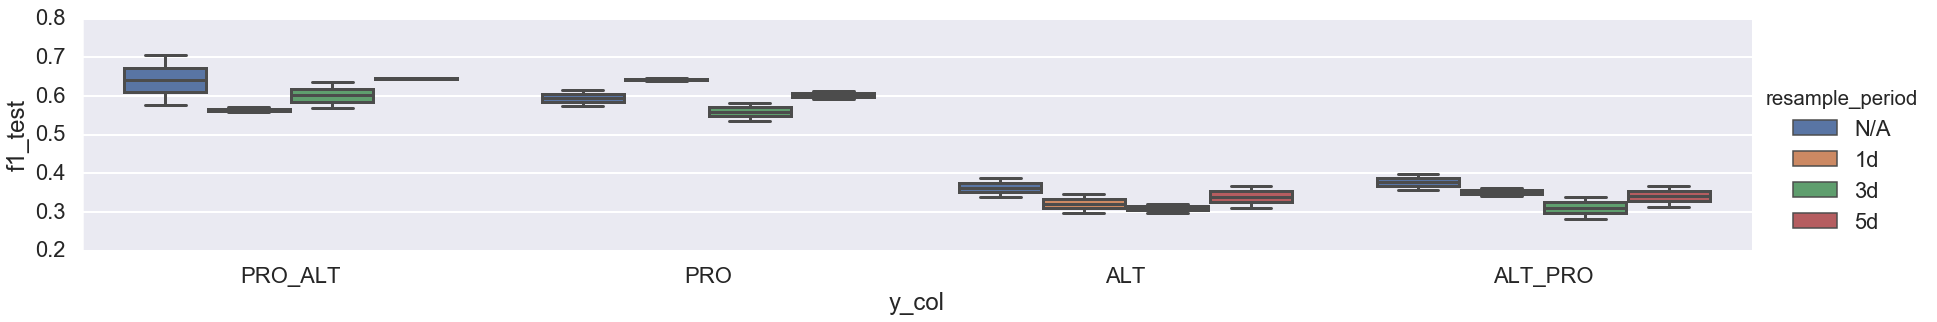

In [114]:
#order = stats_df.loc[(stats_df.y_col.isin(['ALT'])) & (stats_df['cumsum'] == False)].groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[( #(stats_df.y_col.isin(['ALT'])) & 
                               (stats_df['cumsum'] == False) & 
                              (stats_df['value_col'] == 'decline'))], 
            x='y_col', 
            y='f1_test', 
            hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=5, kind='box',
            order=['PRO_ALT', 'PRO', 'ALT', 'ALT_PRO'],
           )


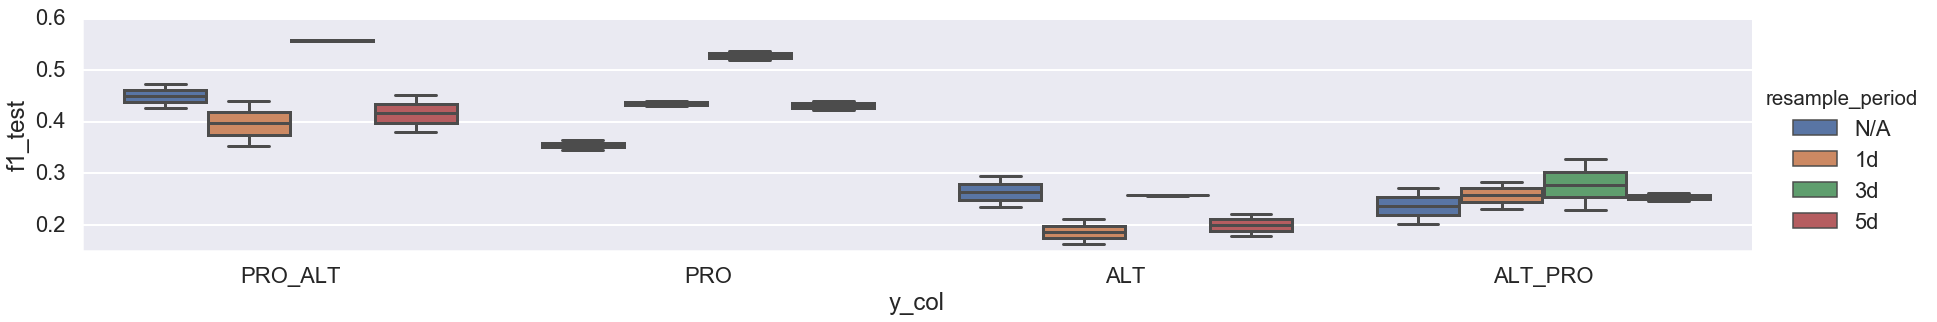

In [115]:
#order = stats_df.loc[(stats_df.y_col.isin(['ALT'])) & (stats_df['cumsum'] == False)].groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[( #(stats_df.y_col.isin(['ALT'])) & 
                               (stats_df['cumsum'] == False) & 
                              (stats_df['value_col'] == 'exponential_diff'))], 
            x='y_col', 
            y='f1_test', 
            hue='resample_period', 
            #col='cumsum',
            #row='y_col', 
            aspect=5, kind='box',
            order=['PRO_ALT', 'PRO', 'ALT', 'ALT_PRO'],
           )


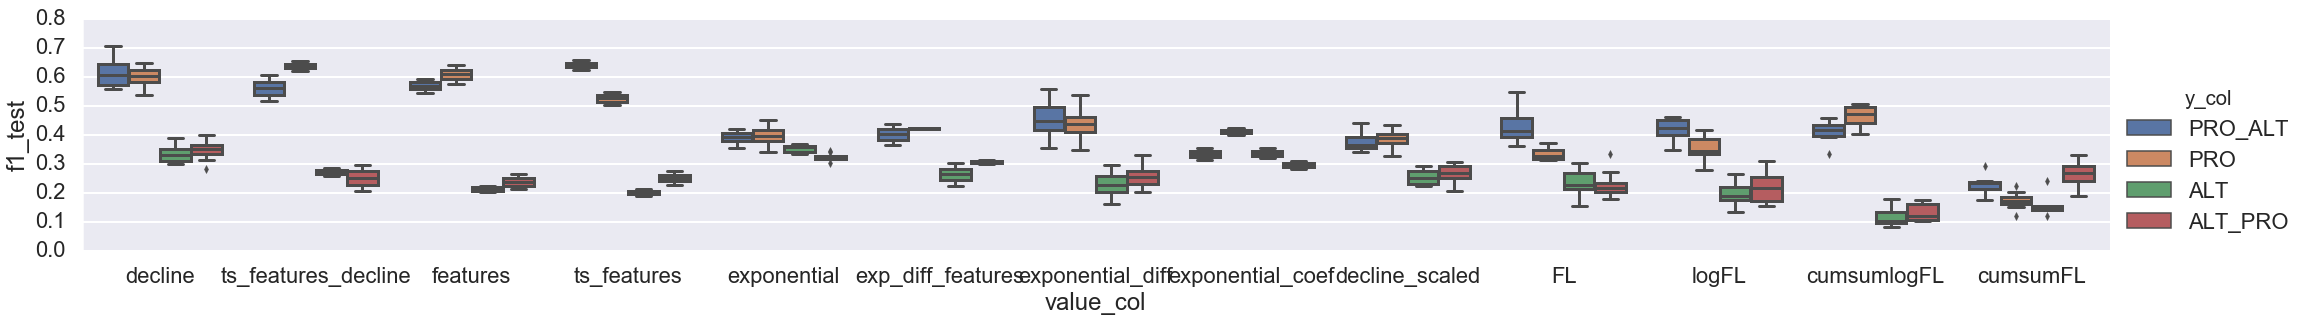

In [116]:
order = stats_df.loc[(stats_df['cumsum'] == False)].groupby('value_col').f1_test.mean().sort_values(ascending=False).index
sns.catplot(data=stats_df.loc[(stats_df['cumsum'] == False)], 
            x='value_col', y='f1_test', 
            #hue='resample_period', 
            #col='cumsum',
            hue='y_col', 
            aspect=6, kind='box',
            order=order,
            hue_order=['PRO_ALT', 'PRO', 'ALT', 'ALT_PRO'],
           )


In [117]:
ts_decline_features_df.shape, ts_features_df.shape

((343, 754), (343, 1134))

In [118]:
order

Index(['decline', 'ts_features_decline', 'features', 'ts_features',
       'exponential', 'exp_diff_features', 'exponential_diff',
       'exponential_coef', 'decline_scaled', 'FL', 'logFL', 'cumsumlogFL',
       'cumsumFL'],
      dtype='object', name='value_col')

In [119]:
stats_df.columns

Index(['accuracy_test', 'accuracy_train', 'cumsum', 'f1_test', 'f1_train',
       'model', 'n_features', 'orig_n_features', 'precision_test',
       'precision_train', 'recall_test', 'recall_train', 'resample_period',
       'support_test', 'support_train', 'value_col', 'y_col'],
      dtype='object')

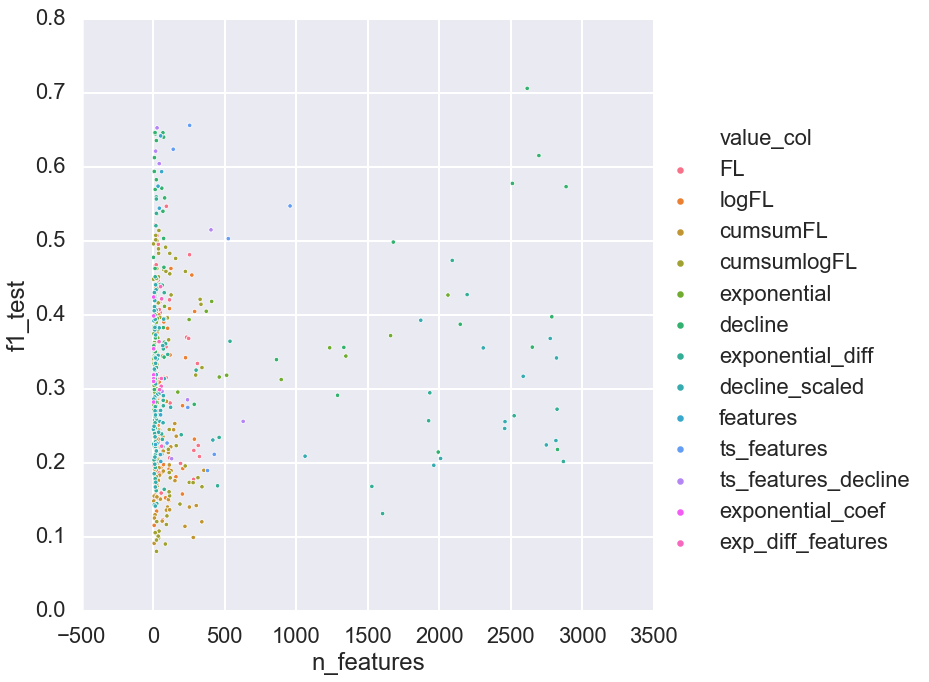

In [120]:
sns.relplot(data=stats_df, x='n_features', y='f1_test', height=10, hue='value_col')

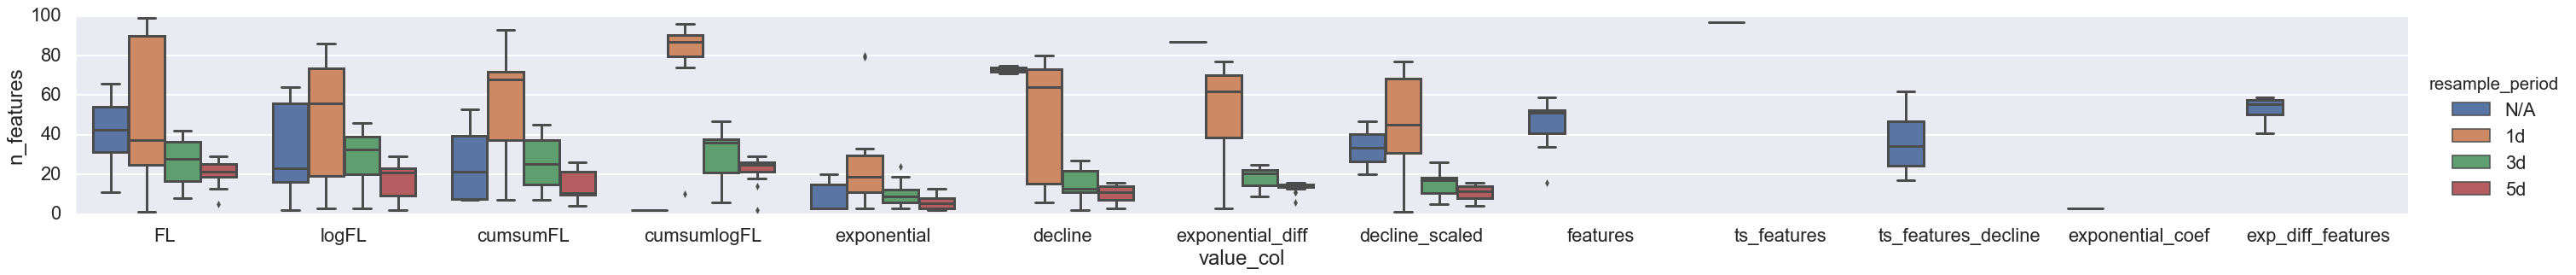

In [121]:
sns.catplot(data=stats_df[stats_df.n_features < 100], y='n_features', hue='resample_period', #hue='f1_test', 
            aspect=8, x='value_col', kind='box')